🎓 VIETNAMESE STUDENTS FEEDBACK DATASET ASSESSMENT
Dataset shape: (16175, 3)
Columns: ['sentence', 'sentiment', 'topic']

📊 SENTIMENT ANALYSIS

 DATASET QUALITY ASSESSMENT REPORT
--------------------------------------------------
1. BASIC DATASET STATISTICS
--------------------------------------------------
📈 Dataset size: 16,175 samples
📝 Features: 5 columns

✅ No missing values found
Text Statistics:
   Average text length: 58.8 characters
   Average word count: 14.2 words
   Min length: 4 characters
   Max length: 718 characters

--------------------------------------------------
2. LABEL DISTRIBUTION ANALYSIS
--------------------------------------------------
Label counts and proportions:
   0 (NEGATIVE): 7,439 samples (46.0%)
   1 (NEUTRAL): 698 samples (4.3%)
   2 (POSITIVE): 8,038 samples (49.7%)
Class imbalance ratio: 11.52
⚠️  High imbalance detected! Consider balancing techniques


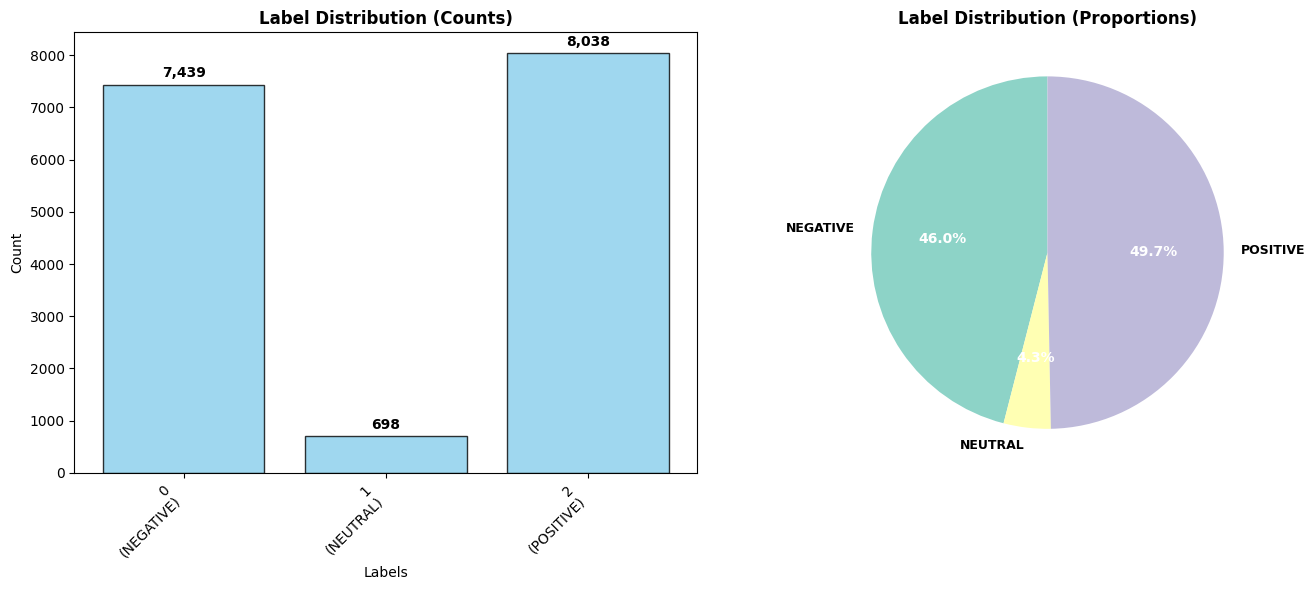


--------------------------------------------------
3. TEXT QUALITY ANALYSIS
--------------------------------------------------
Text length distribution:
count    16175.000000
mean        58.769768
std         43.264994
min          4.000000
25%         31.000000
50%         46.000000
75%         73.000000
max        718.000000
Name: text_length, dtype: float64

🔍 Potential quality issues:
   Empty texts: 0
   Very short texts (<10 chars): 104
   Very long texts (>1000 chars): 0
   Texts with special characters: 16175
   Texts with URLs: 0
   Texts with emails: 0


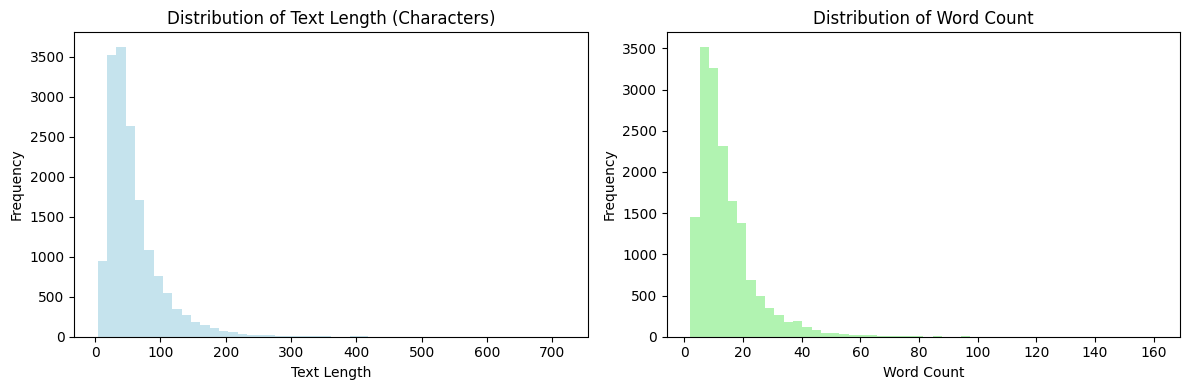


--------------------------------------------------
4. VOCABULARY ANALYSIS
--------------------------------------------------
 Overall vocabulary statistics:
   Total words: 203,815
   Unique words: 2,845
   Vocabulary richness: 0.0140
 Top 10 most common words (overall):
   viên: 6,700
   giảng: 5,239
   dạy: 4,523
   thầy: 4,409
   sinh: 4,278
   học: 4,114
   bài: 3,309
   tình: 3,211
   không: 3,096
   và: 2,904

📊 Words appearing only once: 1,139 (40.0%)

------------------------------------------------------------
 VOCABULARY ANALYSIS BY LABELS
------------------------------------------------------------

🏷️ NEGATIVE (Label 0):
   Samples: 7,439
   Total words: 114,102
   Unique words: 2,352
   Vocabulary richness: 0.0206
   Top 10 words:
     viên: 3,035
     không: 2,579
     học: 2,547
     giảng: 2,039
     sinh: 2,003
     bài: 1,808
     có: 1,697
     thầy: 1,672
     nhiều: 1,479
     nên: 1,442

🏷️ NEUTRAL (Label 1):
   Samples: 698
   Total words: 6,011
   Unique words:

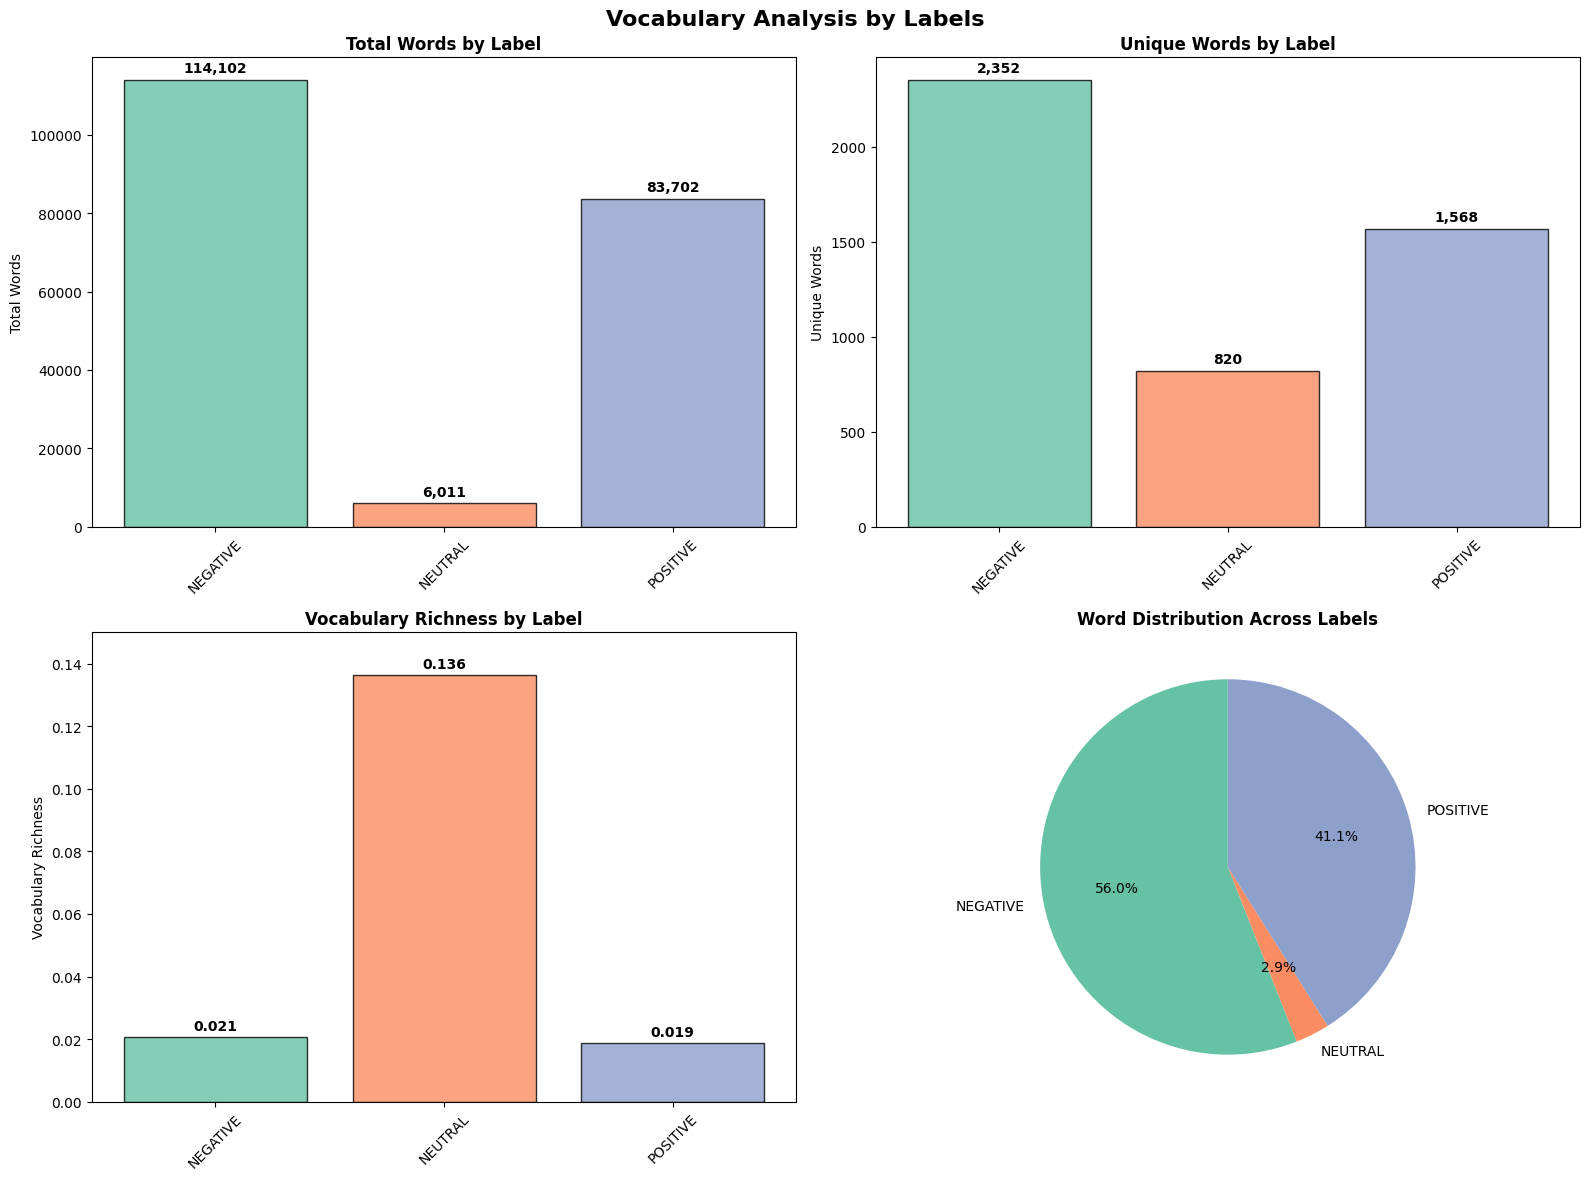


--------------------------------------------------
5. BASELINE MODEL PERFORMANCE
--------------------------------------------------

🔍 Testing Naive Bayes:
   Accuracy: 0.844
   Macro F1: 0.575

   Detailed classification report:
              precision    recall  f1-score   support

    NEGATIVE      0.801     0.919     0.856      1488
     NEUTRAL      0.000     0.000     0.000       139
    POSITIVE      0.893     0.848     0.870      1608

    accuracy                          0.844      3235
   macro avg      0.565     0.589     0.575      3235
weighted avg      0.812     0.844     0.826      3235


🔍 Testing Logistic Regression:
   Accuracy: 0.897
   Macro F1: 0.668

   Detailed classification report:
              precision    recall  f1-score   support

    NEGATIVE      0.880     0.941     0.909      1488
     NEUTRAL      0.667     0.101     0.175       139
    POSITIVE      0.916     0.925     0.920      1608

    accuracy                          0.897      3235
   macro a

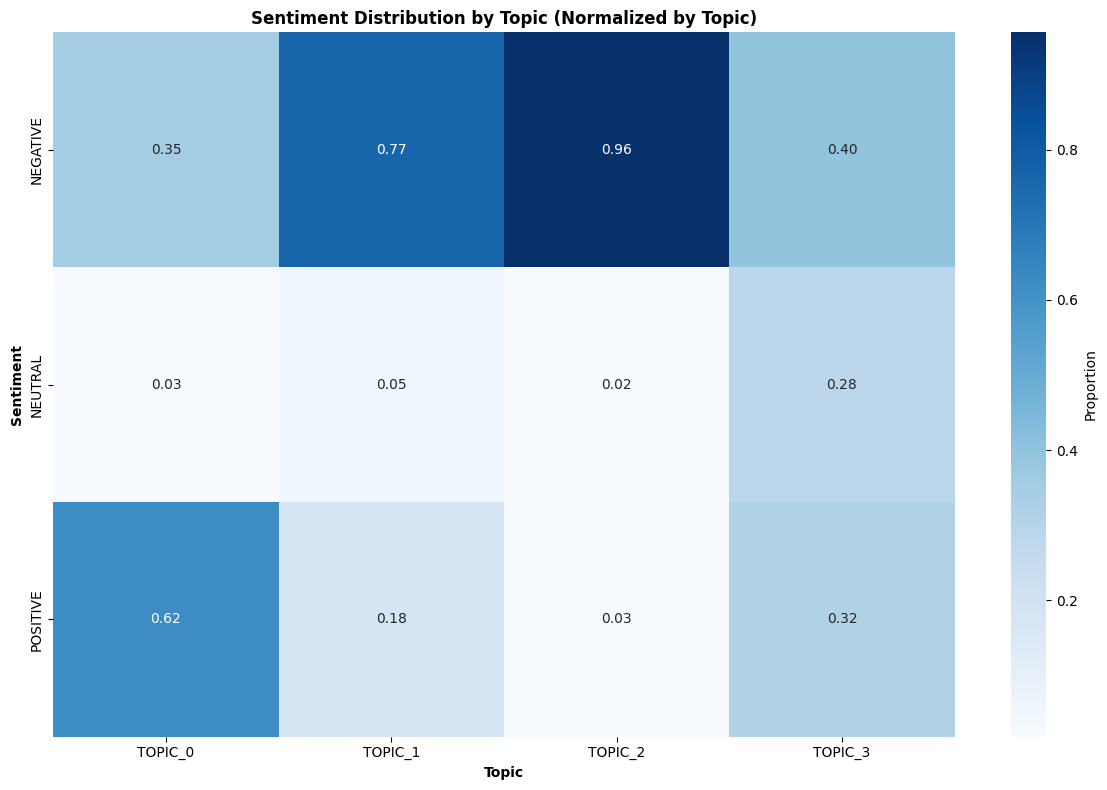

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

class DatasetQualityAssessment:
    def __init__(self, df, text_column='text', label_column='label'):
        self.df = df.copy()
        self.text_col = text_column
        self.label_col = label_column
        self.df['text_length'] = self.df[text_column].astype(str).str.len()
        self.df['word_count'] = self.df[text_column].astype(str).str.split().str.len()

        # Định nghĩa sentiment labels để hiển thị trên biểu đồ
        if label_column == 'sentiment':
            self.label_mapping = {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE"}
        elif label_column == 'topic':
            # Có thể customize theo dataset topic labels
            unique_labels = sorted(self.df[label_column].unique())
            self.label_mapping = {label: f"TOPIC_{label}" for label in unique_labels}
        else:
            # Generic mapping
            unique_labels = sorted(self.df[label_column].unique())
            self.label_mapping = {label: f"LABEL_{label}" for label in unique_labels}

    def basic_statistics(self):
        """Thống kê cơ bản về dataset"""
        print("-" * 50)
        print("1. BASIC DATASET STATISTICS")
        print("-" * 50)

        # Kích thước dataset
        print(f"📈 Dataset size: {len(self.df):,} samples")
        print(f"📝 Features: {self.df.shape[1]} columns")

        # Missing values
        missing = self.df.isnull().sum()
        if missing.sum() > 0:
            print(f"Missing values:")
            for col, count in missing.items():
                if count > 0:
                    print(f"   {col}: {count} ({count/len(self.df)*100:.1f}%)")
        else:
            print("\n✅ No missing values found")

        # Text statistics
        print(f"Text Statistics:")
        print(f"   Average text length: {self.df['text_length'].mean():.1f} characters")
        print(f"   Average word count: {self.df['word_count'].mean():.1f} words")
        print(f"   Min length: {self.df['text_length'].min()} characters")
        print(f"   Max length: {self.df['text_length'].max()} characters")

    def label_distribution(self):
        """Phân tích phân bố nhãn với tên nhãn hiển thị rõ ràng"""
        print("\n" + "-" * 50)
        print("2. LABEL DISTRIBUTION ANALYSIS")
        print("-" * 50)

        # Đếm và tỷ lệ
        label_counts = self.df[self.label_col].value_counts().sort_index()
        label_props = self.df[self.label_col].value_counts(normalize=True).sort_index()

        print("Label counts and proportions:")
        for label_id in label_counts.index:
            count = label_counts[label_id]
            prop = label_props[label_id]
            label_name = self.label_mapping.get(label_id, str(label_id))
            print(f"   {label_id} ({label_name}): {count:,} samples ({prop:.1%})")

        # Class imbalance ratio
        max_class = label_counts.max()
        min_class = label_counts.min()
        imbalance_ratio = max_class / min_class

        print(f"Class imbalance ratio: {imbalance_ratio:.2f}")
        if imbalance_ratio > 10:
            print("⚠️  High imbalance detected! Consider balancing techniques")
        elif imbalance_ratio > 3:
            print("⚠️  Moderate imbalance detected")
        else:
            print("✅ Well balanced dataset")

        # Visualize với tên nhãn rõ ràng
        plt.figure(figsize=(14, 6))

        # Bar chart
        plt.subplot(1, 2, 1)
        # Tạo labels hiển thị trên biểu đồ
        display_labels = [f"{label_id}\n({self.label_mapping.get(label_id, str(label_id))})"
                         for label_id in label_counts.index]

        bars = plt.bar(display_labels, label_counts.values, color='skyblue', alpha=0.8, edgecolor='black')
        plt.title('Label Distribution (Counts)', fontweight='bold', fontsize=12)
        plt.xlabel('Labels', fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.xticks(rotation=45, ha='right')

        # Thêm giá trị lên đầu cột
        for bar, count in zip(bars, label_counts.values):
            plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(label_counts.values)*0.01,
                    f'{count:,}', ha='center', va='bottom', fontweight='bold')

        # Pie chart
        plt.subplot(1, 2, 2)
        colors = sns.color_palette('Set3', len(label_counts))
        pie_labels = [self.label_mapping.get(label_id, str(label_id)) for label_id in label_counts.index]

        wedges, texts, autotexts = plt.pie(label_counts.values,
                                          labels=pie_labels,
                                          autopct='%1.1f%%',
                                          colors=colors,
                                          startangle=90)
        plt.title('Label Distribution (Proportions)', fontweight='bold', fontsize=12)

        # Improve text readability
        for text in texts:
            text.set_fontsize(9)
            text.set_fontweight('bold')
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(10)

        plt.tight_layout()
        plt.show()

    def text_quality_analysis(self):
        """Phân tích chất lượng text"""
        print("\n" + "-" * 50)
        print("3. TEXT QUALITY ANALYSIS")
        print("-" * 50)

        # Text length distribution
        print("Text length distribution:")
        print(self.df['text_length'].describe())

        # Detect potential issues
        empty_texts = (self.df[self.text_col].astype(str).str.strip() == '').sum()
        very_short = (self.df['text_length'] < 10).sum()
        very_long = (self.df['text_length'] > 1000).sum()

        print(f"\n🔍 Potential quality issues:")
        print(f"   Empty texts: {empty_texts}")
        print(f"   Very short texts (<10 chars): {very_short}")
        print(f"   Very long texts (>1000 chars): {very_long}")

        # Special characters and patterns
        special_chars = self.df[self.text_col].astype(str).str.contains(r'[^\w\s\u00C0-\u017F]').sum()
        urls = self.df[self.text_col].astype(str).str.contains(r'http[s]?://').sum()
        emails = self.df[self.text_col].astype(str).str.contains(r'\S+@\S+').sum()

        print(f"   Texts with special characters: {special_chars}")
        print(f"   Texts with URLs: {urls}")
        print(f"   Texts with emails: {emails}")

        # Text length visualization
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.hist(self.df['text_length'], bins=50, alpha=0.7, color='lightblue')
        plt.title('Distribution of Text Length (Characters)')
        plt.xlabel('Text Length')
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        plt.hist(self.df['word_count'], bins=50, alpha=0.7, color='lightgreen')
        plt.title('Distribution of Word Count')
        plt.xlabel('Word Count')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def vocabulary_analysis(self):
        """Phân tích từ vựng tổng thể và theo từng label"""
        print("\n" + "-" * 50)
        print("4. VOCABULARY ANALYSIS")
        print("-" * 50)

        # 1. PHÂN TÍCH TỔNG THỂ
        print(" Overall vocabulary statistics:")

        # Tổng hợp tất cả text
        all_text = ' '.join(self.df[self.text_col].astype(str))
        words = re.findall(r'\b\w+\b', all_text.lower())

        total_words = len(words)
        unique_words = len(set(words))
        vocabulary_richness = unique_words / total_words if total_words > 0 else 0

        print(f"   Total words: {total_words:,}")
        print(f"   Unique words: {unique_words:,}")
        print(f"   Vocabulary richness: {vocabulary_richness:.4f}")

        # Most common words overall
        word_freq = Counter(words)
        print(f" Top 10 most common words (overall):")
        for word, freq in word_freq.most_common(10):
            print(f"   {word}: {freq:,}")

        # Words that appear only once
        hapax_legomena = sum(1 for word, freq in word_freq.items() if freq == 1)
        print(f"\n📊 Words appearing only once: {hapax_legomena:,} ({hapax_legomena/unique_words:.1%})")

        # 2. PHÂN TÍCH THEO TỪNG LABEL
        print(f"\n" + "-" * 60)
        print(" VOCABULARY ANALYSIS BY LABELS")
        print("-" * 60)

        label_vocab_stats = {}

        for label_id in sorted(self.df[self.label_col].unique()):
            label_name = self.label_mapping.get(label_id, str(label_id))
            label_data = self.df[self.df[self.label_col] == label_id]

            print(f"\n🏷️ {label_name} (Label {label_id}):")
            print(f"   Samples: {len(label_data):,}")

            # Combine all text for this label
            label_text = ' '.join(label_data[self.text_col].astype(str))
            label_words = re.findall(r'\b\w+\b', label_text.lower())

            if len(label_words) > 0:
                label_total_words = len(label_words)
                label_unique_words = len(set(label_words))
                label_vocab_richness = label_unique_words / label_total_words

                print(f"   Total words: {label_total_words:,}")
                print(f"   Unique words: {label_unique_words:,}")
                print(f"   Vocabulary richness: {label_vocab_richness:.4f}")

                # Store stats
                label_vocab_stats[label_id] = {
                    'name': label_name,
                    'total_words': label_total_words,
                    'unique_words': label_unique_words,
                    'vocab_richness': label_vocab_richness,
                    'word_freq': Counter(label_words)
                }

                # Top words for this label
                print(f"   Top 10 words:")
                for word, freq in Counter(label_words).most_common(10):
                    print(f"     {word}: {freq:,}")
            else:
                print("   No words found for this label")

        # 3. PHÂN TÍCH TỪ ĐẶC TRƯNG CHO TỪNG LABEL
        print(f"\n" + "-" * 60)
        print(" LABEL-SPECIFIC VOCABULARY ANALYSIS")
        print("-" * 60)

        # Tìm từ đặc trưng cho từng label (words unique to each label)
        all_label_words = {}
        for label_id, stats in label_vocab_stats.items():
            all_label_words[label_id] = set(stats['word_freq'].keys())

        for label_id, stats in label_vocab_stats.items():
            label_name = stats['name']

            # Words unique to this label (not in other labels)
            other_labels = [lid for lid in all_label_words.keys() if lid != label_id]
            other_words = set()
            for other_id in other_labels:
                other_words.update(all_label_words[other_id])

            unique_words = all_label_words[label_id] - other_words

            print(f"\n🎯 {label_name} unique words (top 10):")
            if unique_words:
                unique_with_freq = [(word, stats['word_freq'][word]) for word in unique_words]
                unique_with_freq.sort(key=lambda x: x[1], reverse=True)

                for word, freq in unique_with_freq[:10]:
                    print(f"   {word}: {freq:,}")
            else:
                print("   No unique words found")

        # 4. SO SÁNH VOCABULARY GIỮA CÁC LABELS
        print(f"\n Vocabulary comparison between labels:")
        print("-" * 70)
        print(f"{'Label':<15} {'Total Words':<12} {'Unique Words':<12} {'Richness':<10}")
        print("-" * 70)

        for label_id, stats in label_vocab_stats.items():
            print(f"{stats['name']:<15} {stats['total_words']:<12,} {stats['unique_words']:<12,} {stats['vocab_richness']:<10.4f}")

        print("-" * 70)

        # 5. VISUALIZATION
        self._plot_vocabulary_by_labels(label_vocab_stats)

        return label_vocab_stats

    def _plot_vocabulary_by_labels(self, label_vocab_stats):
        """Vẽ biểu đồ vocabulary analysis theo labels"""
        if not label_vocab_stats:
            return

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Vocabulary Analysis by Labels', fontsize=16, fontweight='bold')

        # Prepare data
        labels = [stats['name'] for stats in label_vocab_stats.values()]
        total_words = [stats['total_words'] for stats in label_vocab_stats.values()]
        unique_words = [stats['unique_words'] for stats in label_vocab_stats.values()]
        vocab_richness = [stats['vocab_richness'] for stats in label_vocab_stats.values()]

        colors = sns.color_palette('Set2', len(labels))

        # 1. Total words by label
        bars1 = ax1.bar(labels, total_words, color=colors, alpha=0.8, edgecolor='black')
        ax1.set_title('Total Words by Label', fontweight='bold')
        ax1.set_ylabel('Total Words')
        ax1.tick_params(axis='x', rotation=45)

        for bar, count in zip(bars1, total_words):
            ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(total_words)*0.01,
                    f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)

        # 2. Unique words by label
        bars2 = ax2.bar(labels, unique_words, color=colors, alpha=0.8, edgecolor='black')
        ax2.set_title('Unique Words by Label', fontweight='bold')
        ax2.set_ylabel('Unique Words')
        ax2.tick_params(axis='x', rotation=45)

        for bar, count in zip(bars2, unique_words):
            ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(unique_words)*0.01,
                    f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)

        # 3. Vocabulary richness by label
        bars3 = ax3.bar(labels, vocab_richness, color=colors, alpha=0.8, edgecolor='black')
        ax3.set_title('Vocabulary Richness by Label', fontweight='bold')
        ax3.set_ylabel('Vocabulary Richness')
        ax3.tick_params(axis='x', rotation=45)
        ax3.set_ylim(0, max(vocab_richness) * 1.1)

        for bar, richness in zip(bars3, vocab_richness):
            ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(vocab_richness)*0.01,
                    f'{richness:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

        # 4. Pie chart of word distribution
        ax4.pie(total_words, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
        ax4.set_title('Word Distribution Across Labels', fontweight='bold')

        plt.tight_layout()
        plt.show()

    def baseline_model_performance(self):
        """Đánh giá hiệu suất model baseline"""
        print("\n" + "-" * 50)
        print("5. BASELINE MODEL PERFORMANCE")
        print("-" * 50)

        # Prepare data
        X = self.df[self.text_col].astype(str)
        y = self.df[self.label_col]

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # Vectorize
        vectorizer = TfidfVectorizer(max_features=5000, stop_words=None)
        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)

        # Models to test
        models = {
            'Naive Bayes': MultinomialNB(),
            'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
            'Logistic (Balanced)': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
        }

        results = {}
        for name, model in models.items():
            print(f"\n🔍 Testing {name}:")
            model.fit(X_train_tfidf, y_train)
            y_pred = model.predict(X_test_tfidf)

            # Classification report
            report = classification_report(y_test, y_pred, output_dict=True)
            accuracy = report['accuracy']
            macro_f1 = report['macro avg']['f1-score']

            results[name] = {
                'accuracy': accuracy,
                'macro_f1': macro_f1
            }

            print(f"   Accuracy: {accuracy:.3f}")
            print(f"   Macro F1: {macro_f1:.3f}")

            # Detailed report với label names
            print(f"\n   Detailed classification report:")
            target_names = [self.label_mapping.get(label, str(label)) for label in sorted(self.df[self.label_col].unique())]
            print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

        return results

    def detect_potential_mislabels(self, confidence_threshold=0.7):
        """Phát hiện nhãn có thể bị sai"""
        print("\n" + "-" * 50)
        print("6. POTENTIAL MISLABEL DETECTION")
        print("-" * 50)

        X = self.df[self.text_col].astype(str)
        y = self.df[self.label_col]

        # Train a model
        vectorizer = TfidfVectorizer(max_features=5000)
        X_tfidf = vectorizer.fit_transform(X)

        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(X_tfidf, y)

        # Get prediction probabilities
        proba = model.predict_proba(X_tfidf)
        predicted_labels = model.predict(X_tfidf)
        max_proba = np.max(proba, axis=1)

        # Find potential mislabels
        mislabeled_candidates = []
        for i, (true_label, pred_label, confidence) in enumerate(zip(y, predicted_labels, max_proba)):
            if true_label != pred_label and confidence > confidence_threshold:
                true_label_name = self.label_mapping.get(true_label, str(true_label))
                pred_label_name = self.label_mapping.get(pred_label, str(pred_label))

                mislabeled_candidates.append({
                    'index': i,
                    'text': X.iloc[i][:100] + "..." if len(X.iloc[i]) > 100 else X.iloc[i],
                    'true_label': true_label,
                    'true_label_name': true_label_name,
                    'predicted_label': pred_label,
                    'predicted_label_name': pred_label_name,
                    'confidence': confidence
                })

        print(f"Found {len(mislabeled_candidates)} potential mislabeled samples:")

        # Show top 5 candidates
        sorted_candidates = sorted(mislabeled_candidates, key=lambda x: x['confidence'], reverse=True)
        for i, candidate in enumerate(sorted_candidates[:5]):
            print(f"\n{i+1}. Index: {candidate['index']}")
            print(f"   Text: {candidate['text']}")
            print(f"   Tagged as: {candidate['true_label_name']} ({candidate['true_label']})")
            print(f"   Model predicts: {candidate['predicted_label_name']} ({candidate['predicted_label']}) - confidence: {candidate['confidence']:.3f}")

        return mislabeled_candidates

    def generate_report(self):
        """Tạo báo cáo tổng hợp"""
        print("\n" + "=" * 70)
        print(" DATASET QUALITY ASSESSMENT REPORT")
        print("=" * 70)

        # Run all analyses
        self.basic_statistics()
        self.label_distribution()
        self.text_quality_analysis()
        vocab_stats = self.vocabulary_analysis()
        baseline_results = self.baseline_model_performance()
        potential_mislabels = self.detect_potential_mislabels()

        # Summary recommendations
        print("\n" + "-" * 50)
        print(" RECOMMENDATIONS")
        print("-" * 50)

        dataset_size = len(self.df)
        if dataset_size < 1000:
            print("⚠️  Dataset size is small. Consider collecting more data.")
        elif dataset_size < 5000:
            print("📊 Dataset size is moderate. Good for initial experiments.")
        else:
            print("✅ Dataset size is good for training robust models.")

        # Class imbalance
        label_counts = self.df[self.label_col].value_counts()
        imbalance_ratio = label_counts.max() / label_counts.min()
        if imbalance_ratio > 5:
            print("⚠️  Consider data balancing techniques (SMOTE, class weights, etc.)")

        # Baseline performance
        best_model = max(baseline_results.items(), key=lambda x: x[1]['accuracy'])
        best_accuracy = best_model[1]['accuracy']

        if best_accuracy < 0.6:
            print("⚠️  Low baseline accuracy. Check data quality and labeling consistency.")
        elif best_accuracy < 0.8:
            print("📈 Moderate baseline accuracy. Dataset has room for improvement.")
        else:
            print("✅ Good baseline accuracy. Dataset quality appears high.")

        # Mislabeling
        mislabel_rate = len(potential_mislabels) / dataset_size
        if mislabel_rate > 0.1:
            print("  High potential mislabel rate. Manual review recommended.")

        print(f"\n Overall dataset quality score: {self._calculate_quality_score():.1f}/10")

    def _calculate_quality_score(self):
        """Tính điểm chất lượng tổng thể (0-10)"""
        score = 10.0

        # Size penalty
        size = len(self.df)
        if size < 500:
            score -= 3
        elif size < 1000:
            score -= 2
        elif size < 3000:
            score -= 1

        # Imbalance penalty
        label_counts = self.df[self.label_col].value_counts()
        imbalance_ratio = label_counts.max() / label_counts.min()
        if imbalance_ratio > 10:
            score -= 2
        elif imbalance_ratio > 5:
            score -= 1
        elif imbalance_ratio > 3:
            score -= 0.5

        # Missing values penalty
        missing_rate = self.df.isnull().sum().sum() / (len(self.df) * self.df.shape[1])
        score -= missing_rate * 2

        # Text quality penalty
        very_short_rate = (self.df['text_length'] < 10).sum() / len(self.df)
        score -= very_short_rate * 2

        return max(0, score)

# Ví dụ sử dụng với dataset thực
if __name__ == "__main__":
    # Load dataset từ Hugging Face (như dataset của bạn)
    from datasets import load_dataset
    ds = load_dataset("uitnlp/vietnamese_students_feedback", revision="refs/convert/parquet")

    df_train = pd.DataFrame(ds["train"][:])
    df_val = pd.DataFrame(ds["validation"][:])
    df_test = pd.DataFrame(ds["test"][:])
    df = pd.concat([df_train, df_val, df_test], ignore_index=True)

    # Chạy đánh giá cho dataset Vietnamese Students Feedback
    print("🎓 VIETNAMESE STUDENTS FEEDBACK DATASET ASSESSMENT")
    print("Dataset shape:", df.shape)
    print("Columns:", df.columns.tolist())

    # Đánh giá sentiment
    print("\n" + "="*60)
    print("📊 SENTIMENT ANALYSIS")
    assessor_sentiment = DatasetQualityAssessment(df, text_column='sentence', label_column='sentiment')
    assessor_sentiment.generate_report()

    # Đánh giá topic classification
    # print("\n" + "="*60)
    # print("🏷️ TOPIC CLASSIFICATION")
    # print("="*60)
    # assessor_topic = DatasetQualityAssessment(df, text_column='sentence', label_column='topic')
    # assessor_topic.generate_report()

    # Phân tích kết hợp sentiment vs topic
    # print("\n" + "="*60)
    # print("🔄 SENTIMENT-TOPIC CROSS ANALYSIS")
    # print("="*60)
    # cross_tab = pd.crosstab(df['sentiment'], df['topic'], margins=True)
    # print("Cross-tabulation of Sentiment vs Topic:")
    # print(cross_tab)

    # Visualize cross-tabulation với labels
    plt.figure(figsize=(12, 8))
    cross_tab_norm = pd.crosstab(df['sentiment'], df['topic'], normalize='columns')

    # Tạo labels cho heatmap
    sentiment_labels = {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE"}
    topic_labels = {i: f"TOPIC_{i}" for i in sorted(df['topic'].unique())}

    # Rename index và columns
    cross_tab_display = cross_tab_norm.copy()
    cross_tab_display.index = [sentiment_labels.get(i, str(i)) for i in cross_tab_display.index]
    cross_tab_display.columns = [topic_labels.get(i, str(i)) for i in cross_tab_display.columns]

    sns.heatmap(cross_tab_display, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Proportion'})
    plt.title('Sentiment Distribution by Topic (Normalized by Topic)', fontweight='bold')
    plt.ylabel('Sentiment', fontweight='bold')
    plt.xlabel('Topic', fontweight='bold')
    plt.tight_layout()
    plt.show()